In [ ]:
!pip install astral


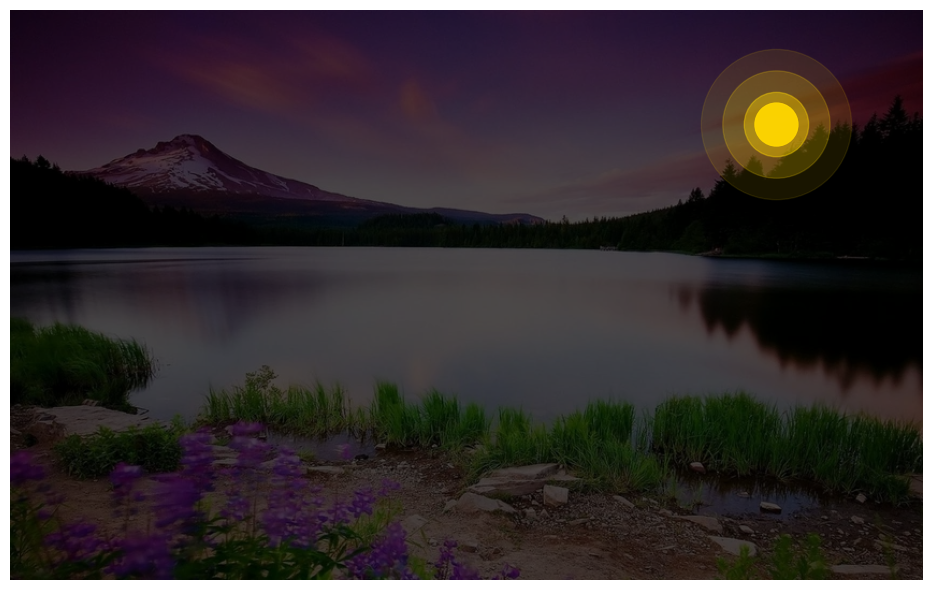

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from datetime import datetime
from astral import LocationInfo
from astral.sun import sun
import numpy as np
from matplotlib.patches import Circle, RegularPolygon

# Load background
img = mpimg.imread('scenery.png')

# Sun & Moon time calculation
city = LocationInfo("Hyderabad", "India")
s = sun(city.observer, date=datetime.now())

sunrise = s['sunrise'].hour + s['sunrise'].minute / 60
sunset = s['sunset'].hour + s['sunset'].minute / 60
now = datetime.now().hour + datetime.now().minute / 60
progress = (now - sunrise) / (sunset - sunrise)
progress = max(0, min(progress, 1))

# Sun position
img_height, img_width = img.shape[0], img.shape[1]
x = img_width * progress
y = img_height * 0.2

# Brightness fade
brightness = max(0.3, min(1.0, (sunset - now) / (sunset - sunrise)))

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.imshow(img * brightness)

# 🎨 Super Shiny Sun (Layered glow)
if sunrise <= now <= sunset:
    # Soft glow layers (multiple fading circles)
    for radius, alpha in zip([70, 50, 30], [0.1, 0.2, 0.4]):
        glow = Circle((x, y), radius, color='gold', alpha=alpha)
        ax.add_patch(glow)

    # Main sun: gradient-like golden center
    sun_core = Circle((x, y), 20, color='#FFD700', alpha=0.95)  # shiny gold
    ax.add_patch(sun_core)

# 🌙 Crescent Moon + ✨ Stars
else:
    moon = Circle((x, y), 30, color='lightgray')
    ax.add_patch(moon)
    cutout = Circle((x + 10, y), 25, color='black')
    ax.add_patch(cutout)

    # Stars
    np.random.seed(42)
    for _ in range(50):
        star_x = np.random.randint(0, img_width)
        star_y = np.random.randint(0, int(img_height * 0.4))
        star = RegularPolygon((star_x, star_y), numVertices=5, radius=2, color='white')
        ax.add_patch(star)

plt.axis('off')

plt.tight_layout()
plt.show()
fig.savefig("sun_wallpaper.png", bbox_inches='tight', dpi=300)


In [1]:
!pip install matplotlib astral pywalpaper


ERROR: Could not find a version that satisfies the requirement pywalpaper (from versions: none)
ERROR: No matching distribution found for pywalpaper
